In [11]:
%matplotlib inline
import numpy as np
import math
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [133]:
class PositiveNegativeCorrelation(object):
    def __init__(self, x, y, J):
        self._x = x
        self._y = y
        self._J = J
        self._x_mean = np.mean(x)
        self._y_mean = np.mean(y)
        self._H_pos = None
        self._H_neg = None

    @property
    def H_pos(self):
        if self._H_pos is None:
            # print("Computing H positive...")
            self._H_pos = self._compute_H_pos()
            # print("H positive value: " + str(self._H_pos))
        return self._H_pos

    @property
    def H_neg(self):
        if self._H_neg is None:
            # print("Computing H negative...")
            self._H_neg = self._compute_H_neg()
            # print("H negative value: " + str(self._H_neg))
        return self._H_neg

    def _compute_H_pos(self):
        H_pos = 0
        for j in range(self._J):
            aux = (((self._x[j] - self._x_mean) -
                    (self._y[j] - self._y_mean))/2.0)**2
            print("% debug % j" + str(j) + " aux " + str(aux) + " xj " + str(self._x[j] )+ " yj " +str(self._y[j]))
            H_pos += aux
        print("% debug % HP " + str(H_pos))
        print("% debug % HP/J " + str((H_pos*1.0/math.fabs(self._J))))
        H_pos = 1 - (H_pos*1.0/math.fabs(self._J))
        return H_pos

    def _compute_H_neg(self):
        H_neg = 0
        for j in range(self._J):
            aux = (((self._x[j] - self._x_mean) +
                    (self._y[j] - self._y_mean))/2.0)**2
            H_neg += aux
        H_neg *= 1.0/math.fabs(self._J)
        H_neg = 1 - H_neg
        return H_neg

In [90]:
class PairBasedCoherence(object):
    def __init__(self, X):
        self._X = np.array(X)
        self._I, self._J = X.shape
        self._HP = None

    @property
    def HP(self):
        if self._HP is None:
            # print("Calculating Pair based coherence..")
            self._HP = self._compute_HP_()
            # print("Paired based coherence value: " + str(self._HP))
        return self._HP

    def _compute_HP_(self):
        HP = 0
        for i in range(self._I):
            for j in range(i+1, self._I):
                if (i==j): 
                    break
                x = self._X[i]
                y = self._X[j]
                correlation = PositiveNegativeCorrelation(x, y,self._J)
                H0 = correlation.H_pos
                # H0 = max(correlation.H_pos,correlation.H_neg)
                HP += H0
        HP *= math.fabs(2.0)/(math.fabs(self._I)*(math.fabs(self._I)-1)) # if self._I > 1 else 0
        
        return HP

In [128]:
data = pd.read_csv('TestData/SimulatedDataCoherence/HighCoherenceMix.csv',header=None)
data = (data - 0.5) * 2.0
data.head()

,0,1,2,3,4,5,6
0,-0.968958,-0.972138,-0.00130,0.97120,-0.01464,-0.987942,-0.978300
1,-0.984715,-0.984170,-0.01050,0.96178,-0.01408,-0.982526,-0.985149
2,-0.981372,-0.999788,0.01434,0.97240,-0.00434,-0.984673,-0.966736
3,-0.993515,-0.986418,0.00594,0.96340,0.00900,-0.990675,-0.962040
4,-0.978198,-0.977526,-0.01388,0.96426,0.00324,-0.964272,-0.996982


In [129]:
coherence = PairBasedCoherence(data)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")

In [134]:
corr = PositiveNegativeCorrelation(np.array(data)[99],np.array(data)[100],data.shape[1])

/home/a20125359/anaconda3/envs/Biclustering/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


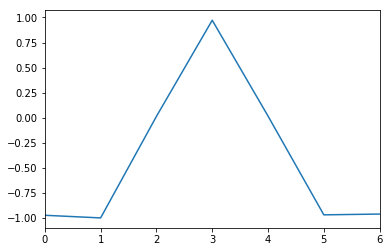

In [135]:
sns.tsplot(np.array(data)[99])

/home/a20125359/anaconda3/envs/Biclustering/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


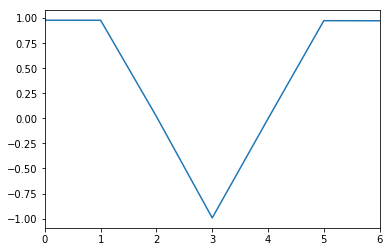

In [136]:
sns.tsplot(np.array(data)[100])

In [137]:
corr.H_pos

% debug % j0 aux 0.313154778933 xj -0.973214 yj 0.97858
% debug % j1 aux 0.328037361951 xj -0.99958024 yj 0.9785
% debug % j2 aux 0.170969564055 xj 0.0131 yj 0.01872
% debug % j3 aux 1.95691606205 xj 0.9723 yj -0.992907
% debug % j4 aux 0.181658936399 xj 0.01648 yj -0.00336
% debug % j5 aux 0.308443989785 xj -0.968944 yj 0.9744
% debug % j6 aux 0.303460334977 xj -0.961114 yj 0.97322
% debug % HP 3.56264102815
% debug % HP/J 0.508948718307


0.49105128169253509

In [138]:
corr.H_neg

0.99992282607105087

In [65]:
corr._x_mean

0.29278769714285707

In [66]:
corr._y_mean

0.70908235714285717

/home/a20125359/anaconda3/envs/Biclustering/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


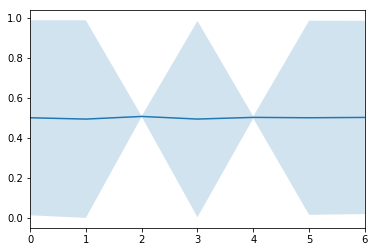

In [64]:
sns.tsplot(np.array(data)[99:101])

In [63]:
np.array(data)[99:100]

array([[  1.33930000e-02,   2.09880000e-04,   5.06550000e-01,
          9.86150000e-01,   5.08240000e-01,   1.55280000e-02,
          1.94430000e-02]])

In [73]:
class MSR(object):
    def __init__(self,data):
        self.data=np.array(data)
        self.n, self.m = data.shape
        self.aiJ = np.mean(data,axis=1)
        self.aIj = np.mean(data,axis=0)
        self.aIJ = np.mean(data)
        self._H = None
        self._HiJ = None
        self._HIj = None
    
    @property
    def H(self):
        if self._H is None:
            print ("computing MSR ...")
            self._H = self._compute_H()
            print ("MSR VALUE " + str(self._H))
        return self._H
        
    @property
    def HiJ(self):
        if self._HiJ is None:
            self._HiJ = self._compute_HiJ()
        return self._HiJ
    
    @property
    def HIj(self):
        if self._HIj is None:
            self._HIj = self._compute_HIj()
        return self._HIj
    
    def _compute_H(self):
        H = 0
        for i in range(self.n):
            for j in range(self.m):
                H  += (self.data[i,j] - self.aIj[j] - self.aiJ[i] + self.aIJ ) ** 2
        H *= 1.0/(self.n * self.m)       
        return H
    
    def _compute_HiJ(self):
        HiJ = np.zeros(self.n)
        for i in range(self.n):
            for j in range(self.m):
                HiJ[i] += ( self.data[i,j] - self.aIj[j] - self.aiJ[i] + self.aIJ )**2
        HiJ *= 1.0/self.m
        return HiJ

    def _compute_HIj(self):
        HIj = np.zeros(self.m)
        for j in range(self.m):
            for i in range(self.n):
                HIj[j] += ( self.data[i,j] - self.aIj[j] - self.aiJ[i] + self.aIJ )**2
        HIj *= 1.0/self.n
        return HIj

In [74]:
msr = MSR(data)

In [75]:
msr.H

computing MSR ...
MSR VALUE 0    0.127476
1    0.127476
2    0.127476
3    0.127476
4    0.127476
5    0.127476
6    0.127476
dtype: float64


0    0.127476
1    0.127476
2    0.127476
3    0.127476
4    0.127476
5    0.127476
6    0.127476
dtype: float64